In [3]:
include("Neel Script.jl")

GSEnergy (generic function with 1 method)

# Rederiving the same results

In [1]:
J = 0.1

BZ_path = HighSymmetryPath()
omega = Array{Float64, 3}(undef, 4, 4, length(BZ_path))  # Initialize a 3D array for 4x4 matrices


for (i, k_vec) in enumerate(BZ_path)
    for l1 in 1:3
        for l2 in l1+1:4
            omega[l1,l2,i] += Omega_k(J,k_vec,l1,l2)/(1+J) # Normalized according to the papre
        end
    end
end

UndefVarError: UndefVarError: `HighSymmetryPath` not defined

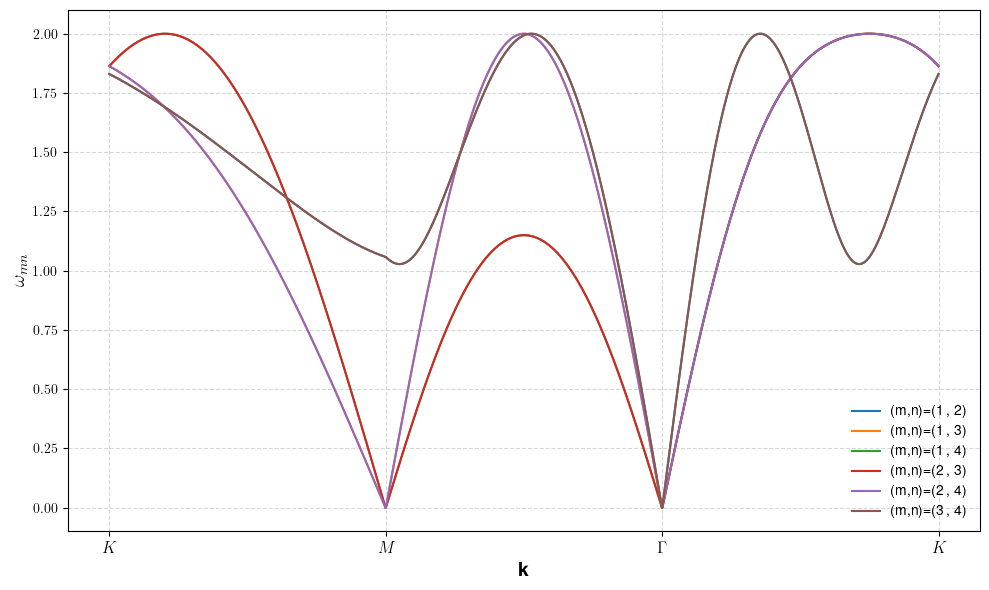

In [68]:
fig, ax = subplots(figsize=(10, 6))

N_points = length(BZ_path) ÷ 3
xticks = [1, N_points, 2*N_points, 3*N_points]
xticklabels = [L"$K$", L"$M$", L"$\Gamma$", L"$K$"]

# Loop over the 4x4 matrix indices
for l1 in 1:3
    for l2 in l1+1:4
        ax.plot(1:length(BZ_path), omega[l1, l2, :], label="(m,n)=($l1 , $l2)")  # Plot each element on the same plot
    end 
end
# Set x-ticks and labels
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)

# Add grid, labels, and legend
ax.grid(true, linestyle="--", alpha=0.5)
ax.set_xlabel(L"$\textbf{k}$", fontsize=14)
ax.set_ylabel(L"$\omega_{mn}$", fontsize=14)
ax.legend(loc="lower right", fontsize=10, frameon=false)

fig.tight_layout()
display(fig)

# GS energy calculstions

In [4]:
J_vec = range(0.0,1.0,length=50)
E = zeros(Float64,length(J_vec))
for (i,J) in enumerate(J_vec)

    E[i] += GSEnergy(J,N=300)

end

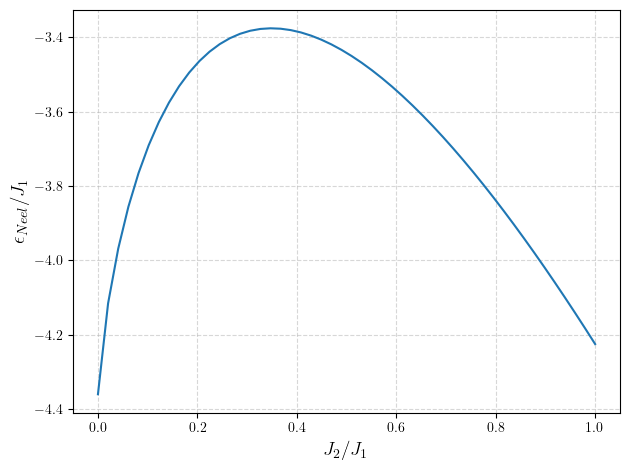

In [6]:
fig, ax = subplots()
ax.plot(J_vec, E, label="E")  # Plot each element on the same plot

# Add grid, labels, and legend
ax.grid(true, linestyle="--", alpha=0.5)
ax.set_xlabel(L"$J_2/J_1$", fontsize=14)
ax.set_ylabel(L"$\epsilon_{Neel}/J_1$", fontsize=14)
# ax.legend(loc="lower right", fontsize=10, frameon=false)

fig.tight_layout()
display(fig)
savefig("Neel vacuum state Energy.pdf")